In [50]:
#installing numpy
!pip install pandas numpy matplotlib

In [94]:
import pandas as pd
import numpy as np
import random

# Set seeds for reproducibility
np.random.seed(42)
random.seed(42)

# Number of households
num_households = 300

# Generate unique Household_IDs
household_ids = np.random.choice(range(10000, 100000), size=num_households, replace=False)
household_ids = [str(id).zfill(4) for id in household_ids]

# Generate synthetic data
data = {
    'Household_ID': household_ids,
    'Food_Availability': np.random.randint(1, 10, size=num_households),
    'Meal_Frequency': np.random.randint(1, 4, size=num_households),
    'Meal_Diversity': np.random.randint(1, 6, size=num_households),
    'Child_Height': np.random.normal(loc=100, scale=15, size=num_households),
    # Generate Child_Weight with clipping
# Generate Child_Weight with clipping to avoid negative or too low values
'Child_Weight' : np.clip(np.random.normal(loc=15, scale=5, size=num_households), a_min=5, a_max=None)
,
    'Child_Age': np.random.randint(1, 6, size=num_households),
    'Malnutrition_Risk': np.random.choice([0, 1], size=num_households, p=[0.7, 0.3]),
    'Season': np.random.choice(['Winter', 'Spring', 'Summer', 'Fall'], size=num_households),
    'Social_Grant': np.random.choice(['Yes', 'No'], size=num_households, p=[0.4, 0.6]),
}

# Create DataFrame
df = pd.DataFrame(data)

# Add Gender column
df['Gender'] = np.random.choice(['Male', 'Female'], size=num_households)

# Rural South African names by gender
female_names = ["Nomvula", "Busi", "Nokuthula", "Thando", "Zanele", "Mpho", "Nontobeko", "Sibongile", "Ayanda", "Nosipho"]
male_names = ["Thabo", "Sipho", "Sibusiso", "Mandla", "Luyanda", "Themba", "Bongani", "Khaya", "Vusi", "Mxolisi"]
surnames = ["Dlamini", "Mhlongo", "Nkosi", "Mathebula", "Mokoena", "Tshabalala", "Mabena", "Baloyi", "Molefe", "Mdletshe"]

# Function to create full name
def generate_name(gender):
    if gender == "Female":
        return f"{random.choice(female_names)} {random.choice(surnames)}"
    else:
        return f"{random.choice(male_names)} {random.choice(surnames)}"

# Apply function to each row
df['Child_Name'] = df['Gender'].apply(generate_name)

# Display sample
print(df.head())


  Household_ID  Food_Availability  Meal_Frequency  Meal_Diversity  \
0        99610                  1               2               2   
1        22456                  3               3               2   
2        63403                  9               1               5   
3        72905                  6               2               1   
4        76339                  8               2               3   

   Child_Height  Child_Weight  Child_Age  Malnutrition_Risk  Season  \
0     91.153275     12.388263          2                  0  Winter   
1    100.341744     16.982245          4                  0  Winter   
2     88.994253      9.205135          5                  0  Summer   
3     91.773364     21.502511          3                  0    Fall   
4     97.267347     20.513037          5                  1  Summer   

  Social_Grant  Gender         Child_Name  
0           No  Female       Busi Dlamini  
1          Yes    Male  Luyanda Mathebula  
2          Yes  Female    

# Exploratory Data Analysis

In [95]:
#Displaying top rows
df.head()

,Household_ID,Food_Availability,Meal_Frequency,Meal_Diversity,Child_Height,Child_Weight,Child_Age,Malnutrition_Risk,Season,Social_Grant,Gender,Child_Name
0,99610,1,2,2,91.153275,12.388263,2,0,Winter,No,Female,Busi Dlamini
1,22456,3,3,2,100.341744,16.982245,4,0,Winter,Yes,Male,Luyanda Mathebula
2,63403,9,1,5,88.994253,9.205135,5,0,Summer,Yes,Female,Thando Nkosi
3,72905,6,2,1,91.773364,21.502511,3,0,Fall,No,Male,Sipho Molefe
4,76339,8,2,3,97.267347,20.513037,5,1,Summer,No,Female,Busi Mdletshe


In [96]:
#Displaying the bottom rows
df.tail()

,Household_ID,Food_Availability,Meal_Frequency,Meal_Diversity,Child_Height,Child_Weight,Child_Age,Malnutrition_Risk,Season,Social_Grant,Gender,Child_Name
295,13580,2,1,4,108.108454,21.206836,2,1,Fall,No,Female,Nontobeko Baloyi
296,47882,5,1,5,69.936132,14.648293,3,0,Spring,No,Male,Thabo Tshabalala
297,94265,4,2,1,94.563901,16.074253,2,0,Spring,No,Male,Luyanda Mabena
298,40223,6,1,4,115.112690,7.664491,2,1,Fall,No,Female,Nontobeko Molefe
299,20930,1,1,1,74.695019,22.360625,1,1,Spring,Yes,Male,Vusi Mdletshe


In [97]:
# Displaying data types
df.dtypes

Household_ID          object
Food_Availability      int32
Meal_Frequency         int32
Meal_Diversity         int32
Child_Height         float64
Child_Weight         float64
Child_Age              int32
Malnutrition_Risk      int32
Season                object
Social_Grant          object
Gender                object
Child_Name            object
dtype: object

In [98]:
#summary statistics
df.describe()

,Food_Availability,Meal_Frequency,Meal_Diversity,Child_Height,Child_Weight,Child_Age,Malnutrition_Risk
count,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000
mean,5.066667,1.953333,2.896667,100.329188,15.287313,3.013333,0.310000
std,2.584147,0.812418,1.404480,16.935423,5.060979,1.437606,0.463266
min,1.000000,1.000000,1.000000,48.679306,5.000000,1.000000,0.000000
25%,3.000000,1.000000,2.000000,89.673685,11.803366,2.000000,0.000000
50%,5.000000,2.000000,3.000000,100.075627,15.537922,3.000000,0.000000
75%,7.000000,3.000000,4.000000,113.418667,18.618895,4.000000,1.000000
max,9.000000,3.000000,5.000000,156.180688,28.745039,5.000000,1.000000


In [99]:
# Displaying index,columns.and data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Household_ID       300 non-null    object 
 1   Food_Availability  300 non-null    int32  
 2   Meal_Frequency     300 non-null    int32  
 3   Meal_Diversity     300 non-null    int32  
 4   Child_Height       300 non-null    float64
 5   Child_Weight       300 non-null    float64
 6   Child_Age          300 non-null    int32  
 7   Malnutrition_Risk  300 non-null    int32  
 8   Season             300 non-null    object 
 9   Social_Grant       300 non-null    object 
 10  Gender             300 non-null    object 
 11  Child_Name         300 non-null    object 
dtypes: float64(2), int32(5), object(5)
memory usage: 22.4+ KB


# Data cleaning

In [100]:
# checking for missing values 
df.isnull().sum()

Household_ID         0
Food_Availability    0
Meal_Frequency       0
Meal_Diversity       0
Child_Height         0
Child_Weight         0
Child_Age            0
Malnutrition_Risk    0
Season               0
Social_Grant         0
Gender               0
Child_Name           0
dtype: int64

In [101]:
# checking duplicates
df.duplicated().sum()

0

  # standardizing

In [102]:
# unique values in the column Season 
df['Season'].unique()

array(['Winter', 'Summer', 'Fall', 'Spring'], dtype=object)

In [103]:
# Renaming 'Fall' to 'Autumn'
df['Season'] = df['Season'].replace('Fall', 'Autumn')
df

,Household_ID,Food_Availability,Meal_Frequency,Meal_Diversity,Child_Height,Child_Weight,Child_Age,Malnutrition_Risk,Season,Social_Grant,Gender,Child_Name
0,99610,1,2,2,91.153275,12.388263,2,0,Winter,No,Female,Busi Dlamini
1,22456,3,3,2,100.341744,16.982245,4,0,Winter,Yes,Male,Luyanda Mathebula
2,63403,9,1,5,88.994253,9.205135,5,0,Summer,Yes,Female,Thando Nkosi
3,72905,6,2,1,91.773364,21.502511,3,0,Autumn,No,Male,Sipho Molefe
4,76339,8,2,3,97.267347,20.513037,5,1,Summer,No,Female,Busi Mdletshe
...,...,...,...,...,...,...,...,...,...,...,...,...
295,13580,2,1,4,108.108454,21.206836,2,1,Autumn,No,Female,Nontobeko Baloyi
296,47882,5,1,5,69.936132,14.648293,3,0,Spring,No,Male,Thabo Tshabalala
297,94265,4,2,1,94.563901,16.074253,2,0,Spring,No,Male,Luyanda Mabena
298,40223,6,1,4,115.112690,7.664491,2,1,Autumn,No,Female,Nontobeko Molefe


In [104]:
# Replacing 1 with 'Yes' and 0 with 'No'
df['Malnutrition_Risk'] = df['Malnutrition_Risk'].replace({1: 'Yes', 0: 'No'})
df

,Household_ID,Food_Availability,Meal_Frequency,Meal_Diversity,Child_Height,Child_Weight,Child_Age,Malnutrition_Risk,Season,Social_Grant,Gender,Child_Name
0,99610,1,2,2,91.153275,12.388263,2,No,Winter,No,Female,Busi Dlamini
1,22456,3,3,2,100.341744,16.982245,4,No,Winter,Yes,Male,Luyanda Mathebula
2,63403,9,1,5,88.994253,9.205135,5,No,Summer,Yes,Female,Thando Nkosi
3,72905,6,2,1,91.773364,21.502511,3,No,Autumn,No,Male,Sipho Molefe
4,76339,8,2,3,97.267347,20.513037,5,Yes,Summer,No,Female,Busi Mdletshe
...,...,...,...,...,...,...,...,...,...,...,...,...
295,13580,2,1,4,108.108454,21.206836,2,Yes,Autumn,No,Female,Nontobeko Baloyi
296,47882,5,1,5,69.936132,14.648293,3,No,Spring,No,Male,Thabo Tshabalala
297,94265,4,2,1,94.563901,16.074253,2,No,Spring,No,Male,Luyanda Mabena
298,40223,6,1,4,115.112690,7.664491,2,Yes,Autumn,No,Female,Nontobeko Molefe


In [105]:
# Setting values to two decimal places
df['Child_Weight'] = df['Child_Weight'].round(2)
df['Child_Height'] = df['Child_Height'].round(2)
df

,Household_ID,Food_Availability,Meal_Frequency,Meal_Diversity,Child_Height,Child_Weight,Child_Age,Malnutrition_Risk,Season,Social_Grant,Gender,Child_Name
0,99610,1,2,2,91.15,12.39,2,No,Winter,No,Female,Busi Dlamini
1,22456,3,3,2,100.34,16.98,4,No,Winter,Yes,Male,Luyanda Mathebula
2,63403,9,1,5,88.99,9.21,5,No,Summer,Yes,Female,Thando Nkosi
3,72905,6,2,1,91.77,21.50,3,No,Autumn,No,Male,Sipho Molefe
4,76339,8,2,3,97.27,20.51,5,Yes,Summer,No,Female,Busi Mdletshe
...,...,...,...,...,...,...,...,...,...,...,...,...
295,13580,2,1,4,108.11,21.21,2,Yes,Autumn,No,Female,Nontobeko Baloyi
296,47882,5,1,5,69.94,14.65,3,No,Spring,No,Male,Thabo Tshabalala
297,94265,4,2,1,94.56,16.07,2,No,Spring,No,Male,Luyanda Mabena
298,40223,6,1,4,115.11,7.66,2,Yes,Autumn,No,Female,Nontobeko Molefe


In [106]:
# renaming my cleaned dataframe
dff = df
dff

,Household_ID,Food_Availability,Meal_Frequency,Meal_Diversity,Child_Height,Child_Weight,Child_Age,Malnutrition_Risk,Season,Social_Grant,Gender,Child_Name
0,99610,1,2,2,91.15,12.39,2,No,Winter,No,Female,Busi Dlamini
1,22456,3,3,2,100.34,16.98,4,No,Winter,Yes,Male,Luyanda Mathebula
2,63403,9,1,5,88.99,9.21,5,No,Summer,Yes,Female,Thando Nkosi
3,72905,6,2,1,91.77,21.50,3,No,Autumn,No,Male,Sipho Molefe
4,76339,8,2,3,97.27,20.51,5,Yes,Summer,No,Female,Busi Mdletshe
...,...,...,...,...,...,...,...,...,...,...,...,...
295,13580,2,1,4,108.11,21.21,2,Yes,Autumn,No,Female,Nontobeko Baloyi
296,47882,5,1,5,69.94,14.65,3,No,Spring,No,Male,Thabo Tshabalala
297,94265,4,2,1,94.56,16.07,2,No,Spring,No,Male,Luyanda Mabena
298,40223,6,1,4,115.11,7.66,2,Yes,Autumn,No,Female,Nontobeko Molefe


# Adding a derived column 

In [107]:
#grouping age by group
dff['Age_Group'] = pd.cut(dff['Child_Age'], bins=[0, 2, 5, 10], labels=['Infant', 'Toddler', 'Child'])
dff

,Household_ID,Food_Availability,Meal_Frequency,Meal_Diversity,Child_Height,Child_Weight,Child_Age,Malnutrition_Risk,Season,Social_Grant,Gender,Child_Name,Age_Group
0,99610,1,2,2,91.15,12.39,2,No,Winter,No,Female,Busi Dlamini,Infant
1,22456,3,3,2,100.34,16.98,4,No,Winter,Yes,Male,Luyanda Mathebula,Toddler
2,63403,9,1,5,88.99,9.21,5,No,Summer,Yes,Female,Thando Nkosi,Toddler
3,72905,6,2,1,91.77,21.50,3,No,Autumn,No,Male,Sipho Molefe,Toddler
4,76339,8,2,3,97.27,20.51,5,Yes,Summer,No,Female,Busi Mdletshe,Toddler
...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,13580,2,1,4,108.11,21.21,2,Yes,Autumn,No,Female,Nontobeko Baloyi,Infant
296,47882,5,1,5,69.94,14.65,3,No,Spring,No,Male,Thabo Tshabalala,Toddler
297,94265,4,2,1,94.56,16.07,2,No,Spring,No,Male,Luyanda Mabena,Infant
298,40223,6,1,4,115.11,7.66,2,Yes,Autumn,No,Female,Nontobeko Molefe,Infant


In [108]:
#seasonality risk flag
dff['Season_Risk'] = dff['Season'].apply(lambda x: 1 if x in ['Winter', 'Autumn'] else 0)
dff

,Household_ID,Food_Availability,Meal_Frequency,Meal_Diversity,Child_Height,Child_Weight,Child_Age,Malnutrition_Risk,Season,Social_Grant,Gender,Child_Name,Age_Group,Season_Risk
0,99610,1,2,2,91.15,12.39,2,No,Winter,No,Female,Busi Dlamini,Infant,1
1,22456,3,3,2,100.34,16.98,4,No,Winter,Yes,Male,Luyanda Mathebula,Toddler,1
2,63403,9,1,5,88.99,9.21,5,No,Summer,Yes,Female,Thando Nkosi,Toddler,0
3,72905,6,2,1,91.77,21.50,3,No,Autumn,No,Male,Sipho Molefe,Toddler,1
4,76339,8,2,3,97.27,20.51,5,Yes,Summer,No,Female,Busi Mdletshe,Toddler,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,13580,2,1,4,108.11,21.21,2,Yes,Autumn,No,Female,Nontobeko Baloyi,Infant,1
296,47882,5,1,5,69.94,14.65,3,No,Spring,No,Male,Thabo Tshabalala,Toddler,0
297,94265,4,2,1,94.56,16.07,2,No,Spring,No,Male,Luyanda Mabena,Infant,0
298,40223,6,1,4,115.11,7.66,2,Yes,Autumn,No,Female,Nontobeko Molefe,Infant,1


C:\Users\letsa\AppData\Local\Temp\ipykernel_12700\4265490376.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=dff, x='Season_Risk', palette='Set2')


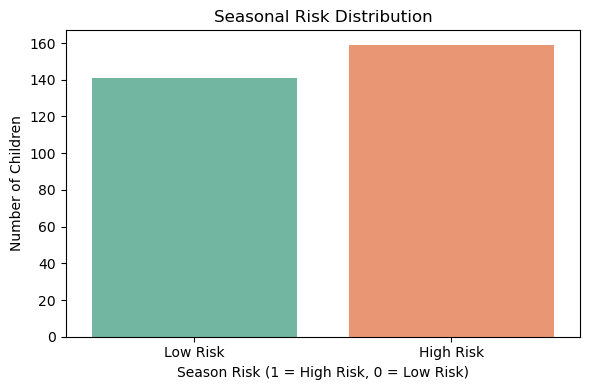

In [109]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Count plot for Season_Risk
plt.figure(figsize=(6, 4))
sns.countplot(data=dff, x='Season_Risk', palette='Set2')

plt.title('Seasonal Risk Distribution')
plt.xlabel('Season Risk (1 = High Risk, 0 = Low Risk)')
plt.ylabel('Number of Children')
plt.xticks([0, 1], ['Low Risk', 'High Risk'])

plt.tight_layout()
plt.show()


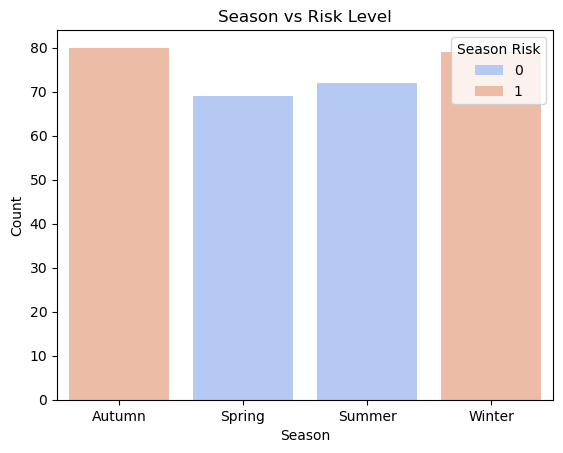

In [110]:
season_risk_counts = dff.groupby(['Season', 'Season_Risk']).size().reset_index(name='Count')
sns.barplot(data=season_risk_counts, x='Season', y='Count', hue='Season_Risk', palette='coolwarm')
plt.title('Season vs Risk Level')
plt.ylabel('Count')
plt.xlabel('Season')
plt.legend(title='Season Risk')
plt.show()


In [111]:
# Remove the column
season_risk = dff.pop('Season_Risk')
age_group = dff.pop('Age_Group')
child_age = dff.pop('Child_Age')
# Insert it at position 1 (Python uses 0-indexing, so 1 = 2nd position)
dff.insert(7, 'Season_Risk', season_risk)
dff.insert(1, 'Age_Group', age_group)
dff.insert(3, 'Child_Age', child_age)
dff

,Household_ID,Age_Group,Food_Availability,Child_Age,Meal_Frequency,Meal_Diversity,Child_Height,Child_Weight,Malnutrition_Risk,Season_Risk,Season,Social_Grant,Gender,Child_Name
0,99610,Infant,1,2,2,2,91.15,12.39,No,1,Winter,No,Female,Busi Dlamini
1,22456,Toddler,3,4,3,2,100.34,16.98,No,1,Winter,Yes,Male,Luyanda Mathebula
2,63403,Toddler,9,5,1,5,88.99,9.21,No,0,Summer,Yes,Female,Thando Nkosi
3,72905,Toddler,6,3,2,1,91.77,21.50,No,1,Autumn,No,Male,Sipho Molefe
4,76339,Toddler,8,5,2,3,97.27,20.51,Yes,0,Summer,No,Female,Busi Mdletshe
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,13580,Infant,2,2,1,4,108.11,21.21,Yes,1,Autumn,No,Female,Nontobeko Baloyi
296,47882,Toddler,5,3,1,5,69.94,14.65,No,0,Spring,No,Male,Thabo Tshabalala
297,94265,Infant,4,2,2,1,94.56,16.07,No,0,Spring,No,Male,Luyanda Mabena
298,40223,Infant,6,2,1,4,115.11,7.66,Yes,1,Autumn,No,Female,Nontobeko Molefe


In [112]:
# Adding a derived column for Body Mass Index
dff['BMI'] = df['Child_Weight'] / ((dff['Child_Height'] / 100) * 2)
# rounding the BMI into 1 decimal place
dff['BMI'] = dff['BMI'].round(1)
dff

,Household_ID,Age_Group,Food_Availability,Child_Age,Meal_Frequency,Meal_Diversity,Child_Height,Child_Weight,Malnutrition_Risk,Season_Risk,Season,Social_Grant,Gender,Child_Name,BMI
0,99610,Infant,1,2,2,2,91.15,12.39,No,1,Winter,No,Female,Busi Dlamini,6.8
1,22456,Toddler,3,4,3,2,100.34,16.98,No,1,Winter,Yes,Male,Luyanda Mathebula,8.5
2,63403,Toddler,9,5,1,5,88.99,9.21,No,0,Summer,Yes,Female,Thando Nkosi,5.2
3,72905,Toddler,6,3,2,1,91.77,21.50,No,1,Autumn,No,Male,Sipho Molefe,11.7
4,76339,Toddler,8,5,2,3,97.27,20.51,Yes,0,Summer,No,Female,Busi Mdletshe,10.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,13580,Infant,2,2,1,4,108.11,21.21,Yes,1,Autumn,No,Female,Nontobeko Baloyi,9.8
296,47882,Toddler,5,3,1,5,69.94,14.65,No,0,Spring,No,Male,Thabo Tshabalala,10.5
297,94265,Infant,4,2,2,1,94.56,16.07,No,0,Spring,No,Male,Luyanda Mabena,8.5
298,40223,Infant,6,2,1,4,115.11,7.66,Yes,1,Autumn,No,Female,Nontobeko Molefe,3.3


In [113]:
df_sorted = dff.sort_values(by='BMI', ascending=True)
df_sorted

,Household_ID,Age_Group,Food_Availability,Child_Age,Meal_Frequency,Meal_Diversity,Child_Height,Child_Weight,Malnutrition_Risk,Season_Risk,Season,Social_Grant,Gender,Child_Name,BMI
99,82563,Infant,2,2,1,3,156.18,5.00,No,1,Winter,Yes,Female,Thando Dlamini,1.6
25,50550,Toddler,9,4,2,4,133.54,5.00,Yes,1,Winter,No,Male,Luyanda Mdletshe,1.9
201,80724,Toddler,1,3,3,5,129.41,5.20,Yes,1,Autumn,No,Male,Sibusiso Nkosi,2.0
35,37753,Infant,1,2,1,4,109.40,5.00,Yes,1,Winter,Yes,Female,Zanele Mhlongo,2.3
44,36217,Toddler,9,4,1,5,93.50,5.00,Yes,1,Winter,Yes,Female,Zanele Mhlongo,2.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
185,55324,Toddler,6,4,3,2,48.68,15.17,Yes,0,Spring,Yes,Female,Zanele Nkosi,15.6
227,50714,Toddler,3,3,3,2,73.01,23.89,No,1,Autumn,Yes,Male,Luyanda Dlamini,16.4
261,32919,Toddler,1,3,1,4,85.76,28.75,Yes,1,Autumn,No,Male,Bongani Baloyi,16.8
181,77328,Toddler,5,3,2,1,71.81,24.06,No,0,Summer,Yes,Male,Thabo Mhlongo,16.8


In [ ]:

# Get min and max of a specific column
min_height = df['BMI'].min()
max_height = df['BMI'].max()

print(f"BMI: {min_height}")
print(f"BMI: {max_height}")

In [114]:
# Function to classify BMI
def classify_bmi(bmi):
    if bmi < 18.5:
        return 'Underweight'
    elif 18.5 <= bmi < 24.9:
        return 'Normal weight'
    elif 25 <= bmi < 29.9:
        return 'Overweight'
    else:
        return 'Obesity'

# Apply the classification function to the BMI column
dff['Weight_Category'] = dff['BMI'].apply(classify_bmi)
dff

,Household_ID,Age_Group,Food_Availability,Child_Age,Meal_Frequency,Meal_Diversity,Child_Height,Child_Weight,Malnutrition_Risk,Season_Risk,Season,Social_Grant,Gender,Child_Name,BMI,Weight_Category
0,99610,Infant,1,2,2,2,91.15,12.39,No,1,Winter,No,Female,Busi Dlamini,6.8,Underweight
1,22456,Toddler,3,4,3,2,100.34,16.98,No,1,Winter,Yes,Male,Luyanda Mathebula,8.5,Underweight
2,63403,Toddler,9,5,1,5,88.99,9.21,No,0,Summer,Yes,Female,Thando Nkosi,5.2,Underweight
3,72905,Toddler,6,3,2,1,91.77,21.50,No,1,Autumn,No,Male,Sipho Molefe,11.7,Underweight
4,76339,Toddler,8,5,2,3,97.27,20.51,Yes,0,Summer,No,Female,Busi Mdletshe,10.5,Underweight
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,13580,Infant,2,2,1,4,108.11,21.21,Yes,1,Autumn,No,Female,Nontobeko Baloyi,9.8,Underweight
296,47882,Toddler,5,3,1,5,69.94,14.65,No,0,Spring,No,Male,Thabo Tshabalala,10.5,Underweight
297,94265,Infant,4,2,2,1,94.56,16.07,No,0,Spring,No,Male,Luyanda Mabena,8.5,Underweight
298,40223,Infant,6,2,1,4,115.11,7.66,Yes,1,Autumn,No,Female,Nontobeko Molefe,3.3,Underweight


In [115]:
# Counting occurrences of each weight category by gender
df_weight_gender = dff.groupby(['Gender', 'Weight_Category']).size().unstack(fill_value=0)

df_weight_gender

Weight_Category,Normal weight,Underweight
Gender,,
Female,0,147
Male,1,152


In [116]:
# Counting occurrences of each weight category by age
df_weight_age = dff.groupby(['Child_Age', 'Weight_Category']).size().unstack(fill_value=0)

df_weight_age

Weight_Category,Normal weight,Underweight
Child_Age,,
1,0,63
2,0,56
3,0,57
4,0,62
5,1,61


In [ ]:
risk_counts = dff['Malnutrition_Risk'].value_counts()
print("Count of each risk level:\n", risk_counts)

# Specifically get the count for 'Yes'
print("Number of children at risk:", risk_counts.get('Yes', 0))

In [ ]:
# social grant acces count
dff['Social_Grant'].value_counts()

In [ ]:
# Counting multricious risk by age
df_mul_risk = dff.groupby(['Child_Age', 'Malnutrition_Risk']).size().unstack(fill_value=0)

df_mul_risk

In [ ]:
# Count how many grant recipients are at risk
grant_risk_count = children_with_grant['Malnutrition_Risk'].value_counts()

print("Malnutrition Risk among Social Grant Recipients:\n", grant_risk_count)


In [ ]:
# Creating the Nutritional Score
dff['Nutritional_Score'] = dff['Food_Availability'] + dff['Meal_Frequency'] + dff['Meal_Diversity']

# Display the DataFrame with the new column
dff

In [ ]:
# Count how many times each weight category appears
weight_counts = dff['Weight_Category'].value_counts()

# Display the result
print(weight_counts)


In [ ]:
#grouping age by group
dff['Age_Group'] = pd.cut(dff['Child_Age'], bins=[0, 2, 5, 10], labels=['Infant', 'Toddler', 'Child'])
dff

In [ ]:
# Reorder columns
df1 = dff[['Household_ID','Child_Name','Gender'] + [col for col in df.columns if col not in ['Household_ID','Child_Name', 'Gender']]]

In [ ]:
# into csv
df1.to_csv('food_security_data.csv', index=False)


In [ ]:
df1